In [20]:
%%capture --no-display
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
#-----------------------------------------------------##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn import ensemble
from scipy import stats 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler

In [21]:
dataset = pd.read_csv('./battery_dataset constructed.csv')
dataset.head()

,Cell,dq_minimum,dq_mean,dq_variance,dq_skewness,dq_kurtosis,Difference,slope_100_2,intercept_100_2,slope_100_91,intercept_100_91,discharge_capacity_2,discharge_capacity_100,cycle_life
0,1,-0.008460,-0.002873,0.000010,-0.532058,NaN,0.468365,-0.000207,1.091144,0.000035,1.072425,1.070689,1.075913,1190
1,2,-0.011004,-0.004100,0.000010,-0.429375,NaN,0.009288,0.000006,1.080965,-0.000041,1.084767,1.075301,1.080630,1179
2,3,-0.017216,-0.004487,0.000018,-1.080194,NaN,0.008131,0.000010,1.084846,-0.000044,1.089364,1.079922,1.084940,1177
3,4,-0.018961,-0.007456,0.000036,-0.439050,NaN,0.006530,0.000017,1.084075,-0.000004,1.085131,1.079723,1.084750,1226
4,5,-0.013958,-0.005750,0.000023,-0.362548,NaN,0.005900,0.000019,1.081875,-0.000029,1.085538,1.078417,1.082646,1227


In [22]:
dataset["cycle_life"]

0      1190
1      1179
2      1177
3      1226
4      1227
       ... 
119    1156
120     796
121     786
122     940
123    1801
Name: cycle_life, Length: 124, dtype: int64

In [23]:
dataset['cycle_life'].unique()

array([1190, 1179, 1177, 1226, 1227, 1074,  636,  870, 1054,  788,  880,
        719,  862,  857,  691,  534,  559, 1014, 1017,  854,  842,  860,
        917,  709,  876,  731,  757,  742,  703,  704,  648,  617,  625,
        966, 1051,  702,  651,  616,  599,  300,  148,  438,  335,  444,
        480,  511,  561,  477,  458,  483,  485,  494,  487,  461,  502,
        489,  513,  527,  495,  471,  468,  509,  498,  481,  492,  519,
        520,  499,  463,  535,  478,  465,  459,  429,  466,  462,  457,
        713, 1009, 1063, 1115, 1048,  828,  667, 1836, 1039, 1078,  817,
        932,  816,  858, 1638, 1315, 1146, 1155,  813,  772, 1002,  825,
        989, 1028,  850,  541,  935, 1284, 1158, 1093,  923, 1935, 1156,
        796,  786,  940, 1801], dtype=int64)

In [24]:
dataset['cycle_life'].mean()

774.2741935483871

In [25]:
dataset['cycle_life'].median()

736.5

In [26]:
dataset['cycle_life'].mode()

0    429
1    461
2    487
3    499
4    731
5    788
6    828
7    858
8    870
9    876
Name: cycle_life, dtype: int64

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  2.,  2., 10.,  9.,  8.,  5.,  4.,  1.,  1.,  0.,  1.,
         3.,  2.,  1.,  1.,  1.,  6.,  2.,  1.,  2.,  3.,  1.,  4.,  3.,
         7.,  5.,  0.,  0.,  3.,  2.,  1.,  0.,  2.,  3.,  2.,  3.,  2.,
         2.,  0.,  1.,  1.,  3.,  2.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 148.  ,  165.87,  183.74,  201.61,  219.48,  237.35,  255.22,
         273.09,  290.96,  308.83,  326.7 ,  344.57,  362.44,  380.31,
         398.18,  416.05,  433.92,  451.79,  469.66,  487.53,  505.4 ,
         523.27,  541.14,  559.01,  576.88,  594.75,  612.62,  630.49,
         648.36,  666.23,  684.1 ,  701.97,  719.84,  737.71,  755.58,
         773.45,  791.32,  809.19,  827.06,  844.93,  862.8 ,  880.67,
        

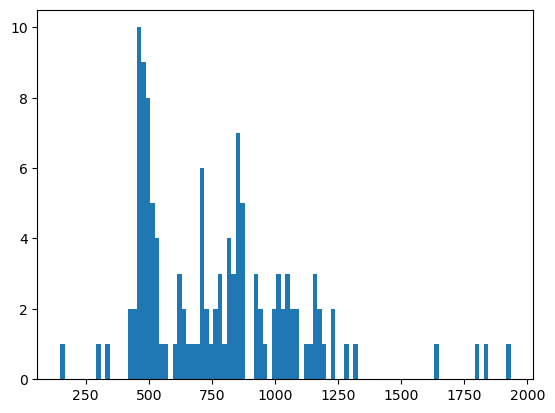

In [27]:
plt.hist(x=dataset['cycle_life'], bins= 100)

In [28]:
dataset['cycle_life'].mode()

0    429
1    461
2    487
3    499
4    731
5    788
6    828
7    858
8    870
9    876
Name: cycle_life, dtype: int64

In [29]:
dataset.head()

,Cell,dq_minimum,dq_mean,dq_variance,dq_skewness,dq_kurtosis,Difference,slope_100_2,intercept_100_2,slope_100_91,intercept_100_91,discharge_capacity_2,discharge_capacity_100,cycle_life
0,1,-0.008460,-0.002873,0.000010,-0.532058,NaN,0.468365,-0.000207,1.091144,0.000035,1.072425,1.070689,1.075913,1190
1,2,-0.011004,-0.004100,0.000010,-0.429375,NaN,0.009288,0.000006,1.080965,-0.000041,1.084767,1.075301,1.080630,1179
2,3,-0.017216,-0.004487,0.000018,-1.080194,NaN,0.008131,0.000010,1.084846,-0.000044,1.089364,1.079922,1.084940,1177
3,4,-0.018961,-0.007456,0.000036,-0.439050,NaN,0.006530,0.000017,1.084075,-0.000004,1.085131,1.079723,1.084750,1226
4,5,-0.013958,-0.005750,0.000023,-0.362548,NaN,0.005900,0.000019,1.081875,-0.000029,1.085538,1.078417,1.082646,1227


In [30]:
dataset.drop(['dq_kurtosis'], axis=1, inplace=True)

In [31]:
print(dataset)

     Cell   dq_minimum   dq_mean  dq_variance  dq_skewness  Difference  \
0        1   -0.008460 -0.002873     0.000010    -0.532058    0.468365   
1        2   -0.011004 -0.004100     0.000010    -0.429375    0.009288   
2        3   -0.017216 -0.004487     0.000018    -1.080194    0.008131   
3        4   -0.018961 -0.007456     0.000036    -0.439050    0.006530   
4        5   -0.013958 -0.005750     0.000023    -0.362548    0.005900   
..     ...         ...       ...          ...          ...         ...   
119    120   -0.017458 -0.006428     0.000035    -0.292539    0.004107   
120    121   -0.022054 -0.009079     0.000051    -0.315431    0.004510   
121    122   -0.024193 -0.009748     0.000060    -0.357134    0.004362   
122    123   -0.025985 -0.011231     0.000074    -0.244616    0.004185   
123    124   -0.016478 -0.007132     0.000030    -0.328143    0.002596   

      slope_100_2  intercept_100_2  slope_100_91  intercept_100_91  \
0   -2.068070e-04         1.091144      0

In [32]:
dataset.head()

,Cell,dq_minimum,dq_mean,dq_variance,dq_skewness,Difference,slope_100_2,intercept_100_2,slope_100_91,intercept_100_91,discharge_capacity_2,discharge_capacity_100,cycle_life
0,1,-0.008460,-0.002873,0.000010,-0.532058,0.468365,-0.000207,1.091144,0.000035,1.072425,1.070689,1.075913,1190
1,2,-0.011004,-0.004100,0.000010,-0.429375,0.009288,0.000006,1.080965,-0.000041,1.084767,1.075301,1.080630,1179
2,3,-0.017216,-0.004487,0.000018,-1.080194,0.008131,0.000010,1.084846,-0.000044,1.089364,1.079922,1.084940,1177
3,4,-0.018961,-0.007456,0.000036,-0.439050,0.006530,0.000017,1.084075,-0.000004,1.085131,1.079723,1.084750,1226
4,5,-0.013958,-0.005750,0.000023,-0.362548,0.005900,0.000019,1.081875,-0.000029,1.085538,1.078417,1.082646,1227


In [33]:
dataset['Cell ']

0        1
1        2
2        3
3        4
4        5
      ... 
119    120
120    121
121    122
122    123
123    124
Name: Cell , Length: 124, dtype: int64

In [34]:
X1=dataset.drop(["Cell "],axis=1)

In [35]:
X1.head()

,dq_minimum,dq_mean,dq_variance,dq_skewness,Difference,slope_100_2,intercept_100_2,slope_100_91,intercept_100_91,discharge_capacity_2,discharge_capacity_100,cycle_life
0,-0.008460,-0.002873,0.000010,-0.532058,0.468365,-0.000207,1.091144,0.000035,1.072425,1.070689,1.075913,1190
1,-0.011004,-0.004100,0.000010,-0.429375,0.009288,0.000006,1.080965,-0.000041,1.084767,1.075301,1.080630,1179
2,-0.017216,-0.004487,0.000018,-1.080194,0.008131,0.000010,1.084846,-0.000044,1.089364,1.079922,1.084940,1177
3,-0.018961,-0.007456,0.000036,-0.439050,0.006530,0.000017,1.084075,-0.000004,1.085131,1.079723,1.084750,1226
4,-0.013958,-0.005750,0.000023,-0.362548,0.005900,0.000019,1.081875,-0.000029,1.085538,1.078417,1.082646,1227


In [36]:
X1.corr()

,dq_minimum,dq_mean,dq_variance,dq_skewness,Difference,slope_100_2,intercept_100_2,slope_100_91,intercept_100_91,discharge_capacity_2,discharge_capacity_100,cycle_life
dq_minimum,1.000000,0.992291,-0.947382,-0.738665,-0.019670,0.630229,-0.247627,0.720716,-0.493381,-0.182882,0.365015,0.768499
dq_mean,0.992291,1.000000,-0.960752,-0.790012,-0.022268,0.685855,-0.225460,0.768189,-0.477040,-0.159868,0.422344,0.727540
dq_variance,-0.947382,-0.960752,1.000000,0.687381,0.010681,-0.757861,0.179349,-0.847261,0.459856,0.097452,-0.511709,-0.601229
dq_skewness,-0.738665,-0.790012,0.687381,1.000000,0.032073,-0.606030,0.089501,-0.645338,0.282971,0.065192,-0.434119,-0.502274
Difference,-0.019670,-0.022268,0.010681,0.032073,1.000000,-0.224406,0.256522,-0.005226,-0.039863,-0.042684,-0.031675,-0.037476
slope_100_2,0.630229,0.685855,-0.757861,-0.606030,-0.224406,1.000000,-0.082762,0.936580,-0.225121,0.074254,0.757455,0.267664
intercept_100_2,-0.247627,-0.225460,0.179349,0.089501,0.256522,-0.082762,1.000000,-0.006688,0.859508,0.926247,0.579244,-0.170387
slope_100_91,0.720716,0.768189,-0.847261,-0.645338,-0.005226,0.936580,-0.006688,1.000000,-0.309771,0.074261,0.761902,0.338582
intercept_100_91,-0.493381,-0.477040,0.459856,0.282971,-0.039863,-0.225121,0.859508,-0.309771,1.000000,0.885937,0.379732,-0.302914
discharge_capacity_2,-0.182882,-0.159868,0.097452,0.065192,-0.042684,0.074254,0.926247,0.074261,0.885937,1.000000,0.676064,-0.105746


<Axes: >

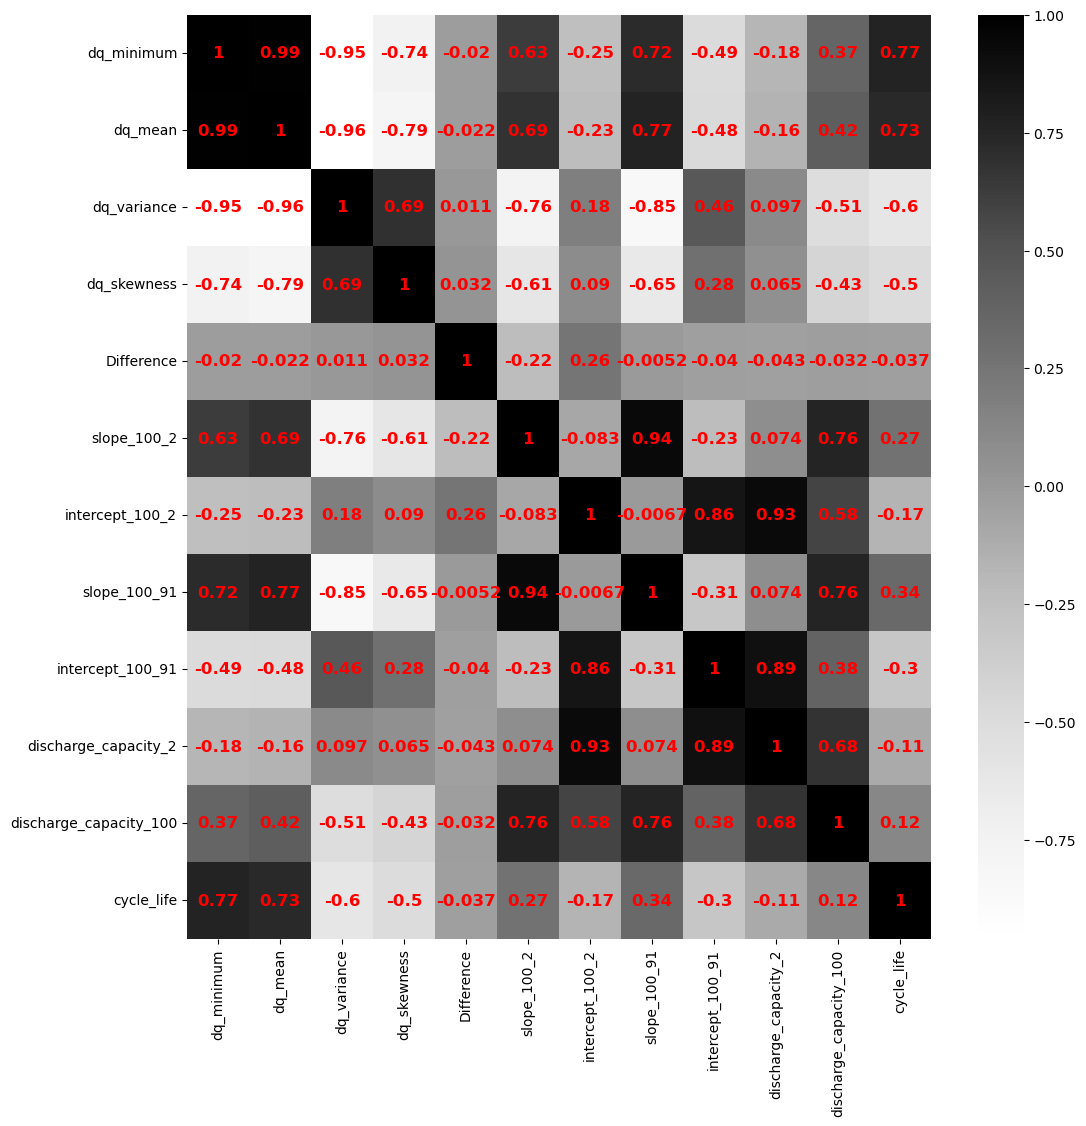

In [37]:
plt.figure(figsize=(12, 12), dpi=100)
sns.heatmap(X1.corr(), cmap='Greys', annot = True,annot_kws={"size": 12, "weight": "bold", "color": "red"})
# plt.savefig('heatmap_high_res.png', dpi=1000, bbox_inches='tight')
# plt.show()

In [38]:
new_column_names = [f'feature{i+1}' for i in range(11)] + ['cycle life']
X1.columns = new_column_names
X1.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,cycle life
0,-0.008460,-0.002873,0.000010,-0.532058,0.468365,-0.000207,1.091144,0.000035,1.072425,1.070689,1.075913,1190
1,-0.011004,-0.004100,0.000010,-0.429375,0.009288,0.000006,1.080965,-0.000041,1.084767,1.075301,1.080630,1179
2,-0.017216,-0.004487,0.000018,-1.080194,0.008131,0.000010,1.084846,-0.000044,1.089364,1.079922,1.084940,1177
3,-0.018961,-0.007456,0.000036,-0.439050,0.006530,0.000017,1.084075,-0.000004,1.085131,1.079723,1.084750,1226
4,-0.013958,-0.005750,0.000023,-0.362548,0.005900,0.000019,1.081875,-0.000029,1.085538,1.078417,1.082646,1227


In [39]:
X1.columns[-1]

'cycle life'

In [42]:
plt.figure(figsize=(12, 12), dpi=1000)
heatmap = sns.heatmap(X1.corr(), cmap='Greys')
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontweight='bold', fontsize=9.5)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontweight='bold', fontsize=9.5)
plt.savefig('heatmap_high_res.png', dpi=1000, bbox_inches='tight')
plt.show()

In [41]:
X1['dq_variance']=np.log10(X1['dq_variance'])

KeyError: 'dq_variance'

In [ ]:
# X1 = X1.drop(['discharge_capacity_100'], axis=1)

In [18]:
X1 = X1.drop(['cycle_life'], axis=1)

NameError: name 'X1' is not defined

In [19]:
X1

NameError: name 'X1' is not defined

In [23]:
Y1=dataset["cycle_life"]

In [24]:
Y1

0      1190
1      1179
2      1177
3      1226
4      1227
       ... 
119    1156
120     796
121     786
122     940
123    1801
Name: cycle_life, Length: 124, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, Y_train_val, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=1000)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.3, random_state=1000)

# Linear Regression Model

In [26]:
model=LinearRegression()

In [27]:
model.fit(X_train,Y_train)

LinearRegression()

In [28]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 88.85737450318157
R2 score is 0.8952477636849465


In [29]:
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
for actual,predicted in zip(Y_test,y_test_predict):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

Actual: 477.00, Predicted: 471.15
Actual: 651.00, Predicted: 636.86
Actual: 462.00, Predicted: 423.98
Actual: 487.00, Predicted: 629.56
Actual: 860.00, Predicted: 810.74
Actual: 989.00, Predicted: 889.08
Actual: 335.00, Predicted: 228.48
Actual: 478.00, Predicted: 509.53
Actual: 1156.00, Predicted: 1106.58
Actual: 519.00, Predicted: 463.81
Actual: 465.00, Predicted: 526.37
Actual: 616.00, Predicted: 602.15
Actual: 466.00, Predicted: 583.51
Actual: 625.00, Predicted: 572.15
Actual: 816.00, Predicted: 903.79
Actual: 788.00, Predicted: 676.11
Actual: 1028.00, Predicted: 1033.64
Actual: 1226.00, Predicted: 1213.76
Actual: 731.00, Predicted: 784.08
Actual: 932.00, Predicted: 935.12
Actual: 1227.00, Predicted: 1393.54
Actual: 561.00, Predicted: 546.24
Actual: 1284.00, Predicted: 1121.34
Actual: 940.00, Predicted: 981.14
Actual: 535.00, Predicted: 540.56
Actual: 842.00, Predicted: 827.32
Actual: 468.00, Predicted: 477.73
Actual: 492.00, Predicted: 530.79
Actual: 489.00, Predicted: 571.88
Actu

In [30]:
y_val_predict = model.predict(X_val)
rmse_val = (np.sqrt(mean_squared_error(Y_val, y_val_predict)))
r2_val = r2_score(Y_val, y_val_predict)
print("The model performance for validation set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_val))
print('R2 score is {}'.format(r2_val))

The model performance for validation set
--------------------------------------
RMSE is 199.352601202613
R2 score is 0.6559427446707826


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_16904\1075501051.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0, 2500), (0, 2500), 'r-', linestyle='dashed', label='y=x line')


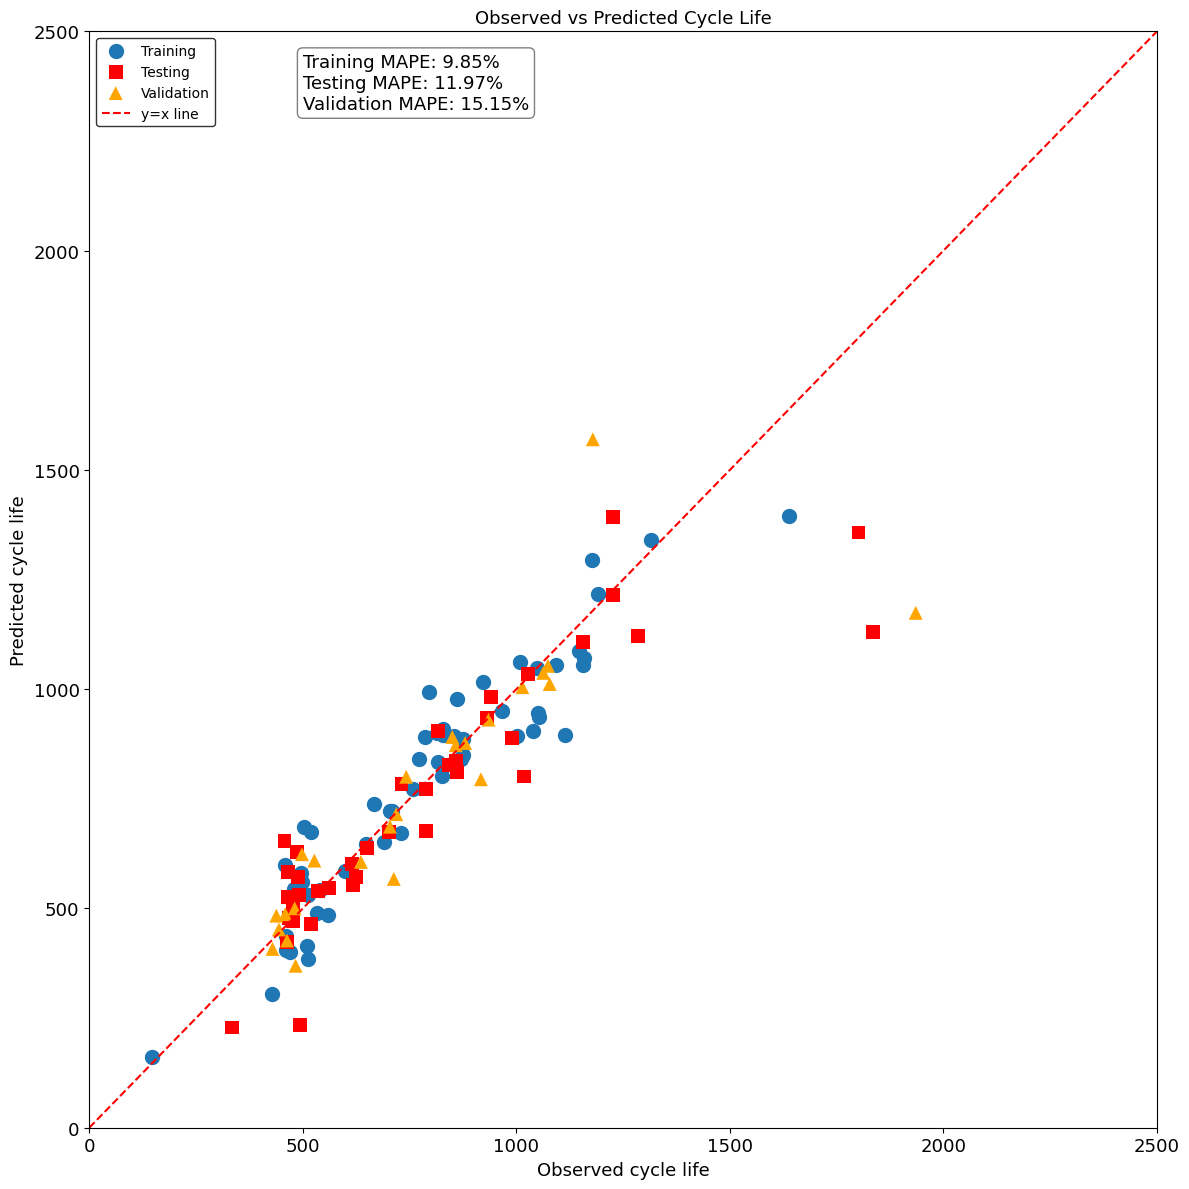

In [31]:
# Calculate Mean Absolute Percentage Error for each dataset
train_mape = mean_absolute_percentage_error(Y_train, y_train_predict) * 100
test_mape = mean_absolute_percentage_error(Y_test, y_test_predict) * 100
val_mape = mean_absolute_percentage_error(Y_val, y_val_predict) * 100

# Plotting
plt.figure(figsize=(12, 12), dpi=100)
plt.title('Observed vs Predicted Cycle Life', fontsize=13)
plt.xlim((0, 2500))
plt.ylim((0, 2500))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training', s=100, marker='o')
plt.scatter(Y_test, y_test_predict, label='Testing', facecolors='red', alpha=1, edgecolors='none', s=100, marker='s')
plt.scatter(Y_val, y_val_predict, label='Validation', facecolors='orange', alpha=1, edgecolors='none', s=100, marker='^')
plt.xlabel("Observed cycle life", fontsize=13)
plt.ylabel("Predicted cycle life", fontsize=13)

# Plot y=x line
plt.plot((0, 2500), (0, 2500), 'r-', linestyle='dashed', label='y=x line')
plt.tight_layout()
leg = plt.legend()
leg.get_frame().set_edgecolor('black')

# Adding the text box with errors
textstr = '\n'.join((
    f'Training MAPE: {train_mape:.2f}%',
    f'Testing MAPE: {test_mape:.2f}%',
    f'Validation MAPE: {val_mape:.2f}%'))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# Place the text box in the upper left
plt.text(0.2, 0.98, textstr, transform=plt.gca().transAxes, fontsize=13,
         verticalalignment='top', bbox=props)
# plt.savefig('graph_high_res.png', dpi=1000, bbox_inches='tight')

plt.show()

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer

# Load and prepare your data (X and y)

# Define the model and k for KFold cross-validation
model = RandomForestRegressor(n_estimators=1000)  # adjust hyperparameters as needed
kfold = KFold(n_splits=10, shuffle=True)  # 10 folds with shuffling

# Create a scorer object using make_scorer
mape_scorer = make_scorer(mean_absolute_percentage_error)

# Perform KFold cross-validation with MAPE scorer
mape_scores = cross_val_score(model, X1, Y1, cv=kfold, scoring=mape_scorer)

# Print the cross-validation scores and average MAPE
print("Cross-validation MAPE scores: ", mape_scores)
print("Average MAPE: ", mape_scores.mean())

Cross-validation MAPE scores:  [0.09659827 0.11407054 0.07731061 0.19451651 0.15761771 0.07588183
 0.1017343  0.10391606 0.11640006 0.1014255 ]
Average MAPE:  0.11394713965237273


In [33]:
# Make predictions on the test set
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

for actual,predicted in zip(Y_test,y_test_predict):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

Actual: 477.00, Predicted: 471.15
Actual: 651.00, Predicted: 636.86
Actual: 462.00, Predicted: 423.98
Actual: 487.00, Predicted: 629.56
Actual: 860.00, Predicted: 810.74
Actual: 989.00, Predicted: 889.08
Actual: 335.00, Predicted: 228.48
Actual: 478.00, Predicted: 509.53
Actual: 1156.00, Predicted: 1106.58
Actual: 519.00, Predicted: 463.81
Actual: 465.00, Predicted: 526.37
Actual: 616.00, Predicted: 602.15
Actual: 466.00, Predicted: 583.51
Actual: 625.00, Predicted: 572.15
Actual: 816.00, Predicted: 903.79
Actual: 788.00, Predicted: 676.11
Actual: 1028.00, Predicted: 1033.64
Actual: 1226.00, Predicted: 1213.76
Actual: 731.00, Predicted: 784.08
Actual: 932.00, Predicted: 935.12
Actual: 1227.00, Predicted: 1393.54
Actual: 561.00, Predicted: 546.24
Actual: 1284.00, Predicted: 1121.34
Actual: 940.00, Predicted: 981.14
Actual: 535.00, Predicted: 540.56
Actual: 842.00, Predicted: 827.32
Actual: 468.00, Predicted: 477.73
Actual: 492.00, Predicted: 530.79
Actual: 489.00, Predicted: 571.88
Actu

C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_16904\3888554649.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0, 2500), (0, 2500), 'r-', linestyle='dashed', label='y=x line')


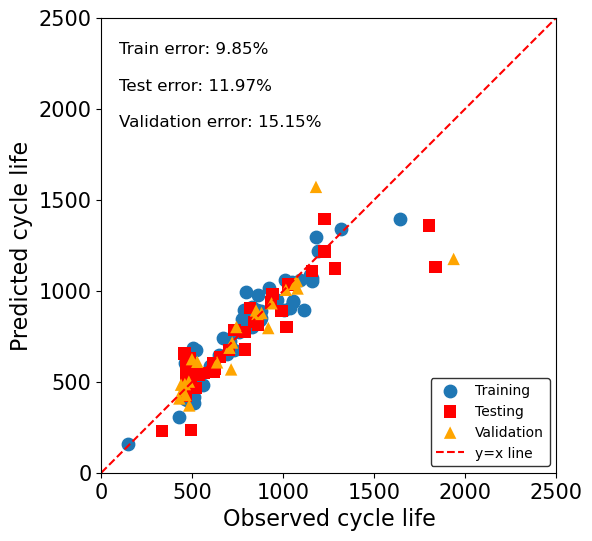

In [35]:
# Calculate percentage errors
train_error = np.mean(np.abs((Y_train - y_train_predict) / Y_train)) * 100
test_error = np.mean(np.abs((Y_test - y_test_predict) / Y_test)) * 100
val_error = np.mean(np.abs((Y_val - y_val_predict) / Y_val)) * 100

plt.figure(figsize=(6, 6), dpi=100)
# plt.title('Observed versus Predicted Cycle Life', fontsize=15)

# Set axis limits and ticks
plt.xlim((0, 2500))
plt.ylim((0, 2500))
plt.xticks(np.linspace(0, 2500, 6), fontsize=15)
plt.yticks(np.linspace(0, 2500, 6), fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)

# Set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

# Scatter plots
plt.scatter(Y_train, y_train_predict, label='Training', s=80, marker='o')
plt.scatter(Y_test, y_test_predict, label='Testing', facecolors='red', alpha=1, edgecolors='none', s=80, marker='s')
plt.scatter(Y_val, y_val_predict, label='Validation', facecolors='orange', alpha=1, edgecolors='none', s=80, marker='^')

# Labels
plt.xlabel("Observed cycle life", fontsize=16)
plt.ylabel("Predicted cycle life", fontsize=16)

# y=x line
plt.plot((0, 2500), (0, 2500), 'r-', linestyle='dashed', label='y=x line')

# Add text annotations for errors
plt.text(100, 2300, f'Train error: {train_error:.2f}%', fontsize=12)
plt.text(100, 2100, f'Test error: {test_error:.2f}%', fontsize=12)
plt.text(100, 1900, f'Validation error: {val_error:.2f}%', fontsize=12)

# Adjust layout and legend position
plt.tight_layout()
leg = plt.legend(loc='lower right')
leg.get_frame().set_edgecolor('black')
plt.show()